In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

plt.close('all')


# %% Read a file of events and write another file with a subset of them
filename_sub = 'slider_depth/events_chunk.txt'

In [2]:
def extract_data(filename):
    infile = open(filename, 'r')
    timestamp = []
    x = []
    y = []
    pol = []
    for line in infile:
        words = line.split()
        timestamp.append(float(words[0]))
        x.append(int(words[1]))
        y.append(int(words[2]))
        pol.append(int(words[3]))
    infile.close()
    return timestamp,x,y,pol

# Call the function to read data    
timestamp, x, y, pol = extract_data(filename_sub)

In [ ]:
img_size = (180,240)


# %% Brightness incremet image (Balance of event polarities)
num_events = 5000  # Number of events used
print("Brightness incremet image: numevents = ", num_events)

# Compute image by accumulating polarities.
img = np.zeros(img_size, np.int64)
for i in range(num_events):
    # Need to convert the polarity bit from {0,1} to {-1,+1} and accumulate
    img[y[i],x[i]] += (2*pol[i]-1)

Brightness incremet image: numevents =  5000


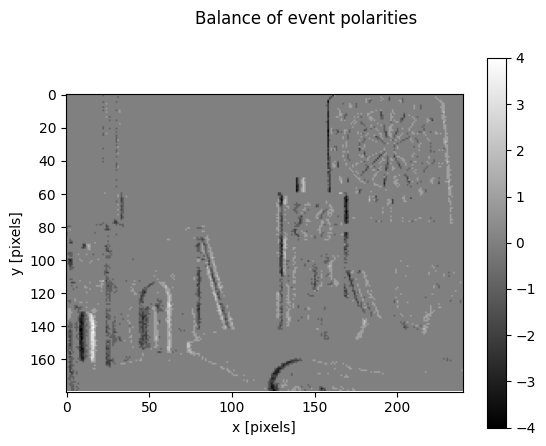

In [5]:
# Display the image in grayscale
fig = plt.figure()
fig.suptitle('Balance of event polarities')
maxabsval = np.amax(np.abs(img))
plt.imshow(img, cmap='gray', clim=(-maxabsval,maxabsval))
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

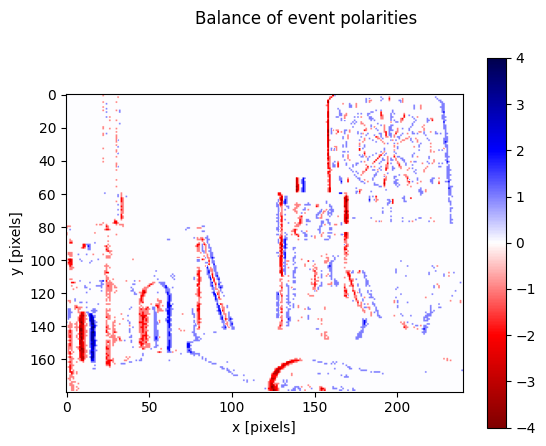

In [6]:
# Same plot as above, but changing the color map
fig = plt.figure()
fig.suptitle('Balance of event polarities')
maxabsval = np.amax(np.abs(img))
plt.imshow(img, cmap='seismic_r', clim=(-maxabsval,maxabsval))
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

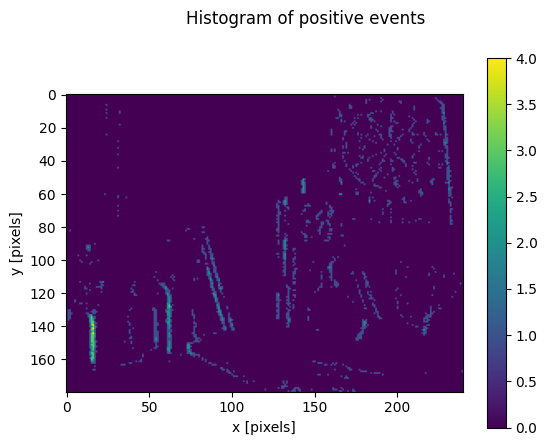

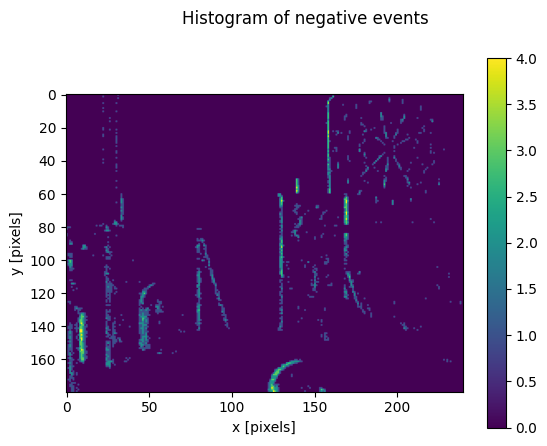

In [ ]:
# %% 2D Histograms of events, split by polarity (positive and negative events in separate images)
img_pos = np.zeros(img_size, np.int64)
img_neg = np.zeros(img_size, np.int64)
for i in range(num_events):
    if (pol[i] > 0):
        img_pos[y[i],x[i]] += 1 # count events
    else:
        img_neg[y[i],x[i]] += 1

fig = plt.figure()
fig.suptitle('Histogram of positive events')
plt.imshow(img_pos)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

fig = plt.figure()
fig.suptitle('Histogram of negative events')
plt.imshow(img_neg)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()


In [12]:
print(img_neg.max())

4
